<a href="https://colab.research.google.com/github/vishal-verma27/Google-Indexing-API-For-WordPress-and-Blogger-For-Instant-Indexing/blob/main/Google_Indexing_API_%7C_Blogger_%7C_WordPress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Created By- [Pykit](pykit.org/)**

You can send the Crawl Requests to Google using this method. This method works for both Wordpress and Blogger websites.

According to Google, the [Indexing API](https://developers.google.com/search/apis/indexing-api/v3/quickstart) can only be used to crawl pages with either JobPosting or BroadcastEvent embedded in a VideoObject. For websites with many short-lived pages like job postings or livestream videos, the Indexing API keeps content fresh in search results because it allows updates to be pushed individually.

***But its working 100% fine with other type of websites also (Tested).***



---



In [ ]:
#@title **Upload JSON Key Here!**
from google.colab import files
try:
  uploaded_key = files.upload()
  print('*'*50);print("Done!");print('*'*50);
except:
  print('*'*50);print("Please Try Again!");print('*'*50);



---



In [ ]:
#@title **Import Necessary Libraries**
#@markdown Using this, we will define the scopes and endpoints of or API and authorize the JSON Key.
for key, value in uploaded_key.items():
    json_key_name = key
from oauth2client.service_account import ServiceAccountCredentials
import httplib2

SCOPES = ["https://www.googleapis.com/auth/indexing"]
ENDPOINT = "https://indexing.googleapis.com/v3/urlNotifications:publish"
print('*'*50);print("Scopes & Endpoint Configured...");print('*'*50);print("Adding Key...");print('*'*50);
# service_account_file.json is the private key that you created for your service account.
JSON_KEY_FILE = json_key_name
print("Key Added Successfully!");print('*'*50);
credentials = ServiceAccountCredentials.from_json_keyfile_name(JSON_KEY_FILE, scopes=SCOPES)
http = credentials.authorize(httplib2.Http())
print("Credentials Successfully Authorized!");print('*'*50);



---



## **Default Quota of API Requests Are As Follows:**
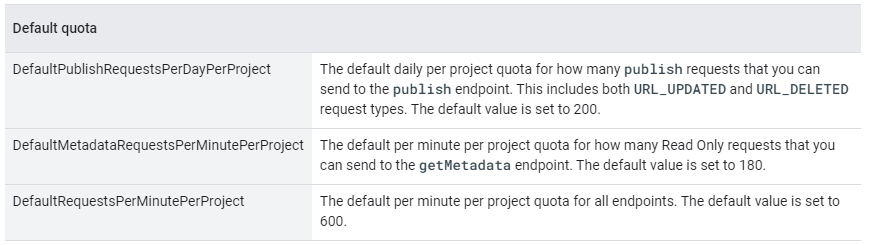


To know more visit [here](https://console.cloud.google.com/apis/api/indexing.googleapis.com/quotas).

In [ ]:
#@title **Provide Site URL & Update Request Type**
#@markdown Site URL will the exact URL you want to update or delete from the Google Search Index. **Also, please make a note that you have to provide URL only for the ownership verfied website. For any other URLs, it will not work.**
siteURL = "Add Your Website Here" #@param {type:"string"}
requestType = "URL_UPDATED" #@param ["URL_UPDATED", "URL_DELETED"]
content = str({'url':siteURL,'type':requestType})
print("RESULT:");print('*'*50);print("URL and Update Request Type Configured!");print('*'*50);

response, content = http.request(ENDPOINT, method="POST", body=content)
output = response['status']

if output == '200':
  print("Successfully Done!");print('*'*50);

else:
  print("Error Code: {}".format(output));print('*'*50);
  print("Visit Here For More: https://developers.google.com/search/apis/indexing-api/v3/core-errors#api-errors");
  print('*'*50);